In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tpu-getting-started/sample_submission.csv
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/09-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/14-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/01-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/13-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/00-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/07-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/12-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/11-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/05-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/04-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/15-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecord

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import os
import re

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.efficientnet import EfficientNetB7
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.metrics import F1Score
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers.schedules import CosineDecay

from sklearn.utils.class_weight import compute_class_weight

import warnings
warnings.filterwarnings('ignore')

In [4]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU: ', tpu.master())
except ValueError:
    tpu = None
    
if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    strategy = tf.distribute.get_strategy()

Running on TPU:  
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local


2024-03-31 09:10:39.258550: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-03-31 09:10:39.258660: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-03-31 09:10:39.258805: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-03-31 09:10:39.258887: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-03-31 09:10:39.259002: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-03-31 09:10:39.259247: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-03-31 09:10:39.259350: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this 

INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


In [5]:
BATCH_SIZE = 16 * strategy.num_replicas_in_sync
TRAIN_SIZE = 12753
VAL_SIZE = 3712
TEST_SIZE = 7382

# Reading the Dataset

In [6]:
def decode_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [299, 299])            # required shape for Xception
    image = tf.cast(image, tf.float32)
    image = (image / 127.5) - 1
    return image

In [17]:
def read_labeled_tfrecord(tfrecord):
    schema = {
        'image': tf.io.FixedLenFeature([], tf.string),
        'class': tf.io.FixedLenFeature([], tf.int64)
    }
    
    record = tf.io.parse_single_example(tfrecord, schema)
    
    image = decode_image(record['image'])
    label = tf.one_hot(record['class'], 104)
    
    return image, label

In [16]:
def read_unlabeled_tfrecord(tfrecord):
    schema = {
        'id': tf.io.FixedLenFeature([], tf.string),
        'image': tf.io.FixedLenFeature([], tf.string)
    }
    
    record = tf.io.parse_single_example(tfrecord, schema)
    
    image = decode_image(record['image'])
    
    return record['id'], image

In [13]:
def load_dataset(files, testing_set=False, augment=False):
    ignore_order = tf.data.Options()
    
    if not testing_set:
        ignore_order.experimental_deterministic = False
        
    dataset = tf.data.TFRecordDataset(files)
    dataset = dataset.with_options(ignore_order)
    
    if not testing_set:
        dataset = dataset.map(read_labeled_tfrecord, num_parallel_calls=tf.data.experimental.AUTOTUNE)
        if augment:
            dataset = dataset.map(data_augmentation, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    else:
        dataset = dataset.map(read_unlabeled_tfrecord, num_parallel_calls=tf.data.experimental.AUTOTUNE)
        
    return dataset

In [19]:
def data_augmentation(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_contrast(image, lower=0.5, upper=1.5)
    
    return image, label

In [14]:
def get_file_names(dataset_type):
    file_names = []
    pattern = f'/kaggle/input/tpu-getting-started/tfrecords-jpeg-512x512/{dataset_type}/*.tfrec'
    files = tf.io.gfile.glob(pattern)
    file_names.extend(files)
        
    return file_names

In [11]:
def load_training_data():
    training_file_names = get_file_names('train')
    dataset = load_dataset(training_file_names, augment=True)
    dataset = dataset.repeat()
    dataset = dataset.shuffle(2048)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

def load_val_data():
    val_file_names = get_file_names('val')
    dataset = load_dataset(val_file_names)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.cache()
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
    return dataset 
    
def load_test_data():
    test_file_names = get_file_names('test')
    dataset = load_dataset(test_file_names, testing_set=True)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
    return dataset 

In [20]:
train = load_training_data()
validate = load_val_data()
test = load_test_data()

# Data Exploration:

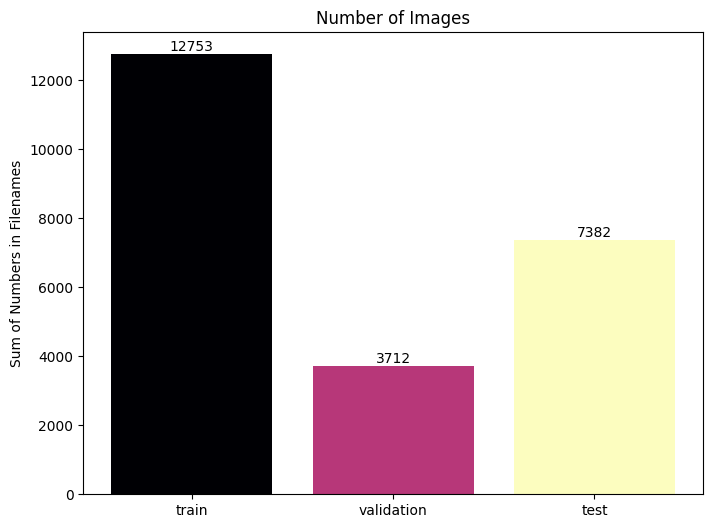

In [21]:
train_files = get_file_names('train')
val_files = get_file_names('val')
test_files = get_file_names('test')

pattern = '-(\d+).tfrec'

train_files_sum = sum(map(lambda x: int(re.search(pattern, x).group(1)), train_files))
val_files_sum = sum(map(lambda x: int(re.search(pattern, x).group(1)), val_files))
test_files_sum = sum(map(lambda x: int(re.search(pattern, x).group(1)), test_files))

categories = ['train', 'validation', 'test']
values = [train_files_sum, val_files_sum, test_files_sum]

cmap = plt.get_cmap('magma')
colors = cmap(np.linspace(0, 1, len(values)))

plt.figure(figsize=(8, 6))
bars = plt.bar(categories, values, color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height, f'{int(height)}',
             ha='center', va='bottom', color='black')

plt.title('Number of Images')
plt.ylabel('Sum of Numbers in Filenames')
plt.show()

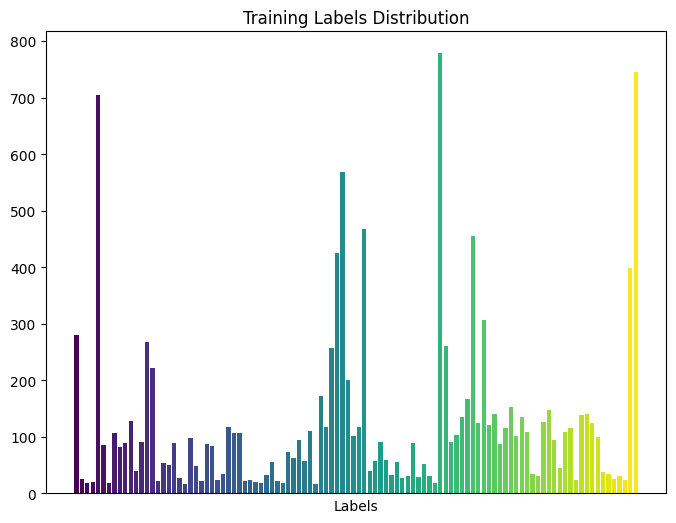

In [22]:
train_labels_ds = train.map(lambda image, label: label).unbatch()
train_labels = next(iter(train_labels_ds.batch(TRAIN_SIZE))).numpy()
label_indices = np.argmax(train_labels, axis=1)

unique, counts = np.unique(label_indices, return_counts=True)

plt.figure(figsize=(8, 6))
bars = plt.bar(unique, counts, color=plt.get_cmap('viridis')(np.linspace(0, 1, len(unique))))

plt.xticks([]) 
plt.tick_params(axis='x', length=0)  
plt.xlabel('Labels')
plt.title('Training Labels Distribution')

plt.show()

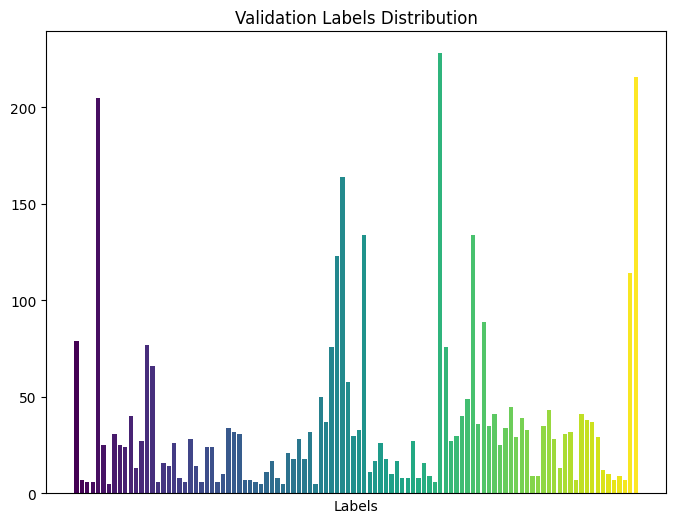

In [23]:
val_labels_ds = validate.map(lambda image, label: label).unbatch()
val_labels =  next(iter(val_labels_ds.batch(VAL_SIZE))).numpy()
val_label_indices = np.argmax(val_labels, axis=1)

unique, counts = np.unique(val_label_indices, return_counts=True)

plt.figure(figsize=(8, 6))
bars = plt.bar(unique, counts, color=plt.get_cmap('viridis')(np.linspace(0, 1, len(unique))))

plt.xticks([]) 
plt.tick_params(axis='x', length=0)  
plt.xlabel('Labels')
plt.title('Validation Labels Distribution')

plt.show()

# Model training and evaluation :


In [24]:
with strategy.scope():
    base_model = Xception(include_top=False, weights='imagenet', input_shape=(299,299,3))
    
    model = Sequential([
        base_model,
        BatchNormalization(),
        GlobalAveragePooling2D(),
        Dense(1024, activation='relu'),
        Dropout(0.1),
        Dense(512, activation='relu'),
        Dropout(0.1),
        Dense(256, activation='relu'),
        Dropout(0.1),
        Dense(104, activation='softmax')
    ])
    
    model.compile(
        optimizer='adamax',
        loss='categorical_crossentropy',
        metrics=[F1Score(average='macro')]
    )
    
    train_history = model.fit(
        train,
        steps_per_epoch=100,
        epochs=100,
        validation_data=validate,
        validation_steps=15
    )


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


I0000 00:00:1711876333.974469      13 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Epoch 1/100


2024-03-31 09:12:14.601963: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-03-31 09:12:14.625967: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-03-31 09:12:14.650239: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-03-31 09:12:14.675229: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-03-31 09:12:14.698937: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-03-31 09:12:14.725496: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-03-31 09:12:14.749411: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this 

  1/100 ━━━━━━━━━━━━━━━━━━━━ 2:32:30 92s/step - f1_score: 0.0215 - loss: 37.0105

2024-03-31 09:13:46.577616: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-03-31 09:13:46.577753: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-03-31 09:13:46.577856: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-03-31 09:13:46.577971: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-03-31 09:13:46.578063: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-03-31 09:13:46.578185: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-03-31 09:13:46.578295: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this 

100/100 ━━━━━━━━━━━━━━━━━━━━ 129s 369ms/step - f1_score: 0.3218 - loss: 30.5751 - val_f1_score: 0.1325 - val_loss: 2.9777
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 215ms/step - f1_score: 1.4292 - loss: 19.3280 - val_f1_score: 0.2711 - val_loss: 1.9759
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 213ms/step - f1_score: 2.3790 - loss: 14.4771 - val_f1_score: 0.3760 - val_loss: 1.2856
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 196ms/step - f1_score: 2.9940 - loss: 11.7036 - val_f1_score: 0.4858 - val_loss: 0.9508
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 201ms/step - f1_score: 3.5032 - loss: 9.9110 - val_f1_score: 0.4533 - val_loss: 0.8668
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 199ms/step - f1_score: 4.0549 - loss: 8.2536 - val_f1_score: 0.5072 - val_loss: 1.0048
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 203ms/step - f1_score: 4.3125 - loss: 7.3891 - val_f1_score: 0.5139 - val_loss: 0.6811
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 198ms/step - f1_score: 4.5769 - loss: 

In [25]:
model.evaluate(validate)

2024-03-31 09:44:58.311000: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignVariableOp.


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - f1_score: 4.4966 - loss: 4.0847


[0.35620906949043274, 0.7500990629196167]

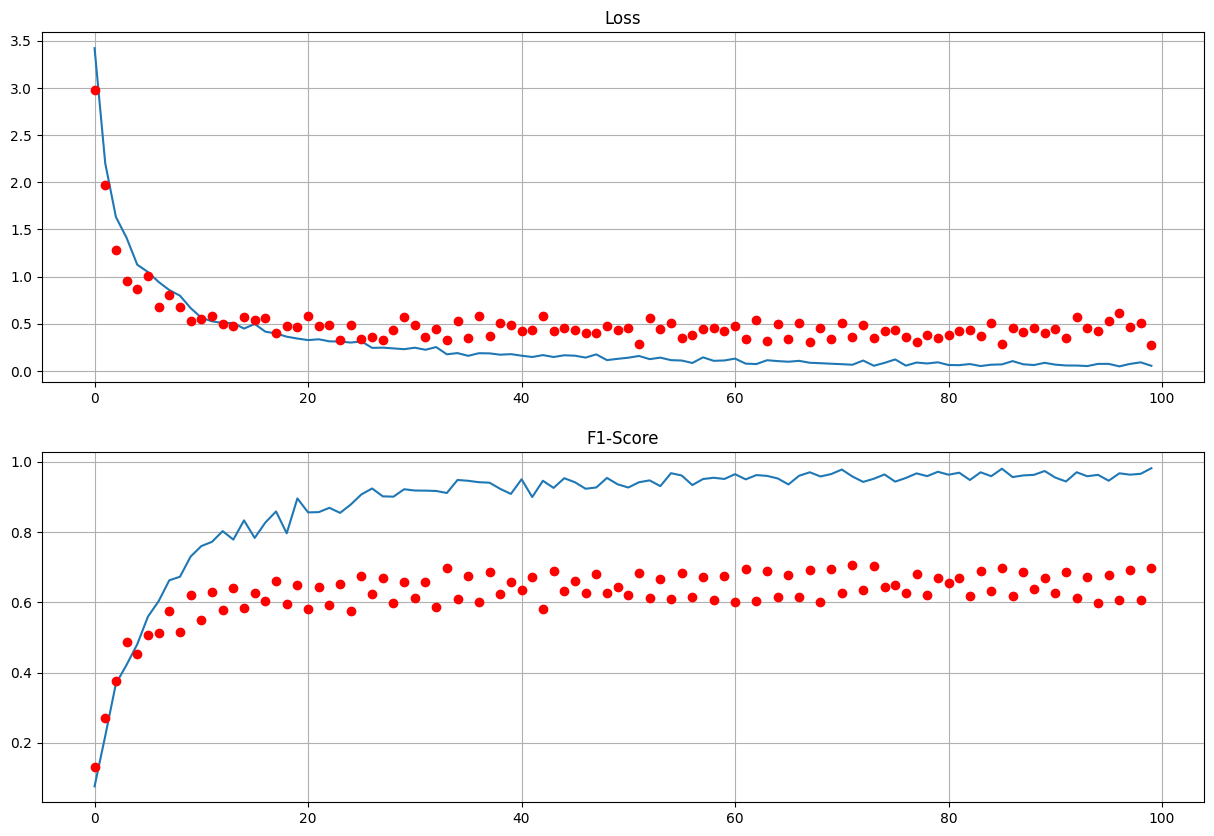

In [28]:
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'], 'ro')
plt.title('Loss')
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(train_history.history['f1_score'])
plt.plot(train_history.history['val_f1_score'], 'ro')
plt.title('F1-Score')
plt.grid(True)

In [29]:
test_images = test.map(lambda idx, image: image)
predictions_list = []

for batch_images in test_images:
    batch_predictions = model(batch_images, training=False) 
    predictions_list.append(batch_predictions)

all_predictions = np.concatenate(predictions_list, axis=0)
predicted_classes = np.argmax(all_predictions, axis=-1)

In [31]:
test_ids_ds = test.map(lambda idx, image: idx).unbatch()
test_ids = next(iter(test_ids_ds.batch(TEST_SIZE))).numpy().astype('U')

submission = pd.DataFrame({'id': test_ids, 'label': predicted_classes})
submission.to_csv('submission.csv', index=False)